# Playing with Mesa

In [17]:
# model.py
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        # The agent's step will go here.
        # print(self.unique_id)
        if self.wealth == 0:
            return
        other_agent = random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1
        pass

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [18]:
import random

In [19]:
model = MoneyModel(10)
for i in range(10):
    model.step()

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

NameError: name 'model' is not defined

(array([442., 303., 143.,  63.,  32.,   9.,   8.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

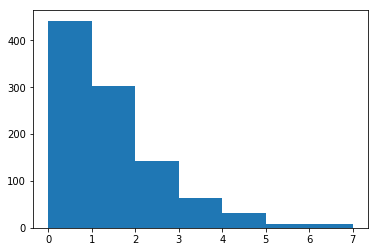

In [21]:
# run.py
all_wealth = []
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth)+1))

In [26]:
# model.py
from mesa.datacollection import DataCollector
from mesa.space import MultiGrid

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        print(possible_steps)
        new_position = random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()
            
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini},
            agent_reporters={"Wealth": lambda a: a.wealth})

    def step(self):
        '''Advance the model by one step.'''
        self.datacollector.collect(self)
        self.schedule.step()

In [27]:
# run.py
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

[(2, 3), (3, 3), (4, 3), (2, 4), (4, 4), (2, 5), (3, 5), (4, 5)]
[(9, 6), (0, 6), (1, 6), (9, 7), (1, 7), (9, 8), (0, 8), (1, 8)]
[(1, 5), (2, 5), (3, 5), (1, 6), (3, 6), (1, 7), (2, 7), (3, 7)]
[(2, 4), (3, 4), (4, 4), (2, 5), (4, 5), (2, 6), (3, 6), (4, 6)]
[(4, 1), (5, 1), (6, 1), (4, 2), (6, 2), (4, 3), (5, 3), (6, 3)]
[(5, 3), (6, 3), (7, 3), (5, 4), (7, 4), (5, 5), (6, 5), (7, 5)]
[(9, 0), (0, 0), (1, 0), (9, 1), (1, 1), (9, 2), (0, 2), (1, 2)]
[(6, 0), (7, 0), (8, 0), (6, 1), (8, 1), (6, 2), (7, 2), (8, 2)]
[(7, 4), (8, 4), (9, 4), (7, 5), (9, 5), (7, 6), (8, 6), (9, 6)]
[(1, 6), (2, 6), (3, 6), (1, 7), (3, 7), (1, 8), (2, 8), (3, 8)]
[(6, 2), (7, 2), (8, 2), (6, 3), (8, 3), (6, 4), (7, 4), (8, 4)]
[(5, 7), (6, 7), (7, 7), (5, 8), (7, 8), (5, 9), (6, 9), (7, 9)]
[(2, 8), (3, 8), (4, 8), (2, 9), (4, 9), (2, 0), (3, 0), (4, 0)]
[(4, 5), (5, 5), (6, 5), (4, 6), (6, 6), (4, 7), (5, 7), (6, 7)]
[(8, 5), (9, 5), (0, 5), (8, 6), (0, 6), (8, 7), (9, 7), (0, 7)]
[(7, 6), (8, 6), (9, 6), 

[(1, 6), (2, 6), (3, 6), (1, 7), (3, 7), (1, 8), (2, 8), (3, 8)]
[(8, 9), (9, 9), (0, 9), (8, 0), (0, 0), (8, 1), (9, 1), (0, 1)]
[(7, 4), (8, 4), (9, 4), (7, 5), (9, 5), (7, 6), (8, 6), (9, 6)]
[(9, 3), (0, 3), (1, 3), (9, 4), (1, 4), (9, 5), (0, 5), (1, 5)]
[(0, 4), (1, 4), (2, 4), (0, 5), (2, 5), (0, 6), (1, 6), (2, 6)]
[(1, 1), (2, 1), (3, 1), (1, 2), (3, 2), (1, 3), (2, 3), (3, 3)]
[(6, 7), (7, 7), (8, 7), (6, 8), (8, 8), (6, 9), (7, 9), (8, 9)]
[(3, 9), (4, 9), (5, 9), (3, 0), (5, 0), (3, 1), (4, 1), (5, 1)]
[(3, 9), (4, 9), (5, 9), (3, 0), (5, 0), (3, 1), (4, 1), (5, 1)]
[(2, 8), (3, 8), (4, 8), (2, 9), (4, 9), (2, 0), (3, 0), (4, 0)]
[(9, 7), (0, 7), (1, 7), (9, 8), (1, 8), (9, 9), (0, 9), (1, 9)]
[(8, 9), (9, 9), (0, 9), (8, 0), (0, 0), (8, 1), (9, 1), (0, 1)]
[(4, 8), (5, 8), (6, 8), (4, 9), (6, 9), (4, 0), (5, 0), (6, 0)]
[(4, 4), (5, 4), (6, 4), (4, 5), (6, 5), (4, 6), (5, 6), (6, 6)]
[(8, 1), (9, 1), (0, 1), (8, 2), (0, 2), (8, 3), (9, 3), (0, 3)]
[(1, 1), (2, 1), (3, 1), 

[(2, 3), (3, 3), (4, 3), (2, 4), (4, 4), (2, 5), (3, 5), (4, 5)]
[(7, 2), (8, 2), (9, 2), (7, 3), (9, 3), (7, 4), (8, 4), (9, 4)]
[(5, 4), (6, 4), (7, 4), (5, 5), (7, 5), (5, 6), (6, 6), (7, 6)]
[(7, 3), (8, 3), (9, 3), (7, 4), (9, 4), (7, 5), (8, 5), (9, 5)]
[(8, 6), (9, 6), (0, 6), (8, 7), (0, 7), (8, 8), (9, 8), (0, 8)]
[(2, 3), (3, 3), (4, 3), (2, 4), (4, 4), (2, 5), (3, 5), (4, 5)]
[(9, 4), (0, 4), (1, 4), (9, 5), (1, 5), (9, 6), (0, 6), (1, 6)]
[(1, 0), (2, 0), (3, 0), (1, 1), (3, 1), (1, 2), (2, 2), (3, 2)]
[(6, 7), (7, 7), (8, 7), (6, 8), (8, 8), (6, 9), (7, 9), (8, 9)]
[(7, 3), (8, 3), (9, 3), (7, 4), (9, 4), (7, 5), (8, 5), (9, 5)]
[(8, 5), (9, 5), (0, 5), (8, 6), (0, 6), (8, 7), (9, 7), (0, 7)]
[(4, 3), (5, 3), (6, 3), (4, 4), (6, 4), (4, 5), (5, 5), (6, 5)]
[(3, 3), (4, 3), (5, 3), (3, 4), (5, 4), (3, 5), (4, 5), (5, 5)]
[(7, 7), (8, 7), (9, 7), (7, 8), (9, 8), (7, 9), (8, 9), (9, 9)]
[(6, 3), (7, 3), (8, 3), (6, 4), (8, 4), (6, 5), (7, 5), (8, 5)]
[(2, 1), (3, 1), (4, 1), 

[(8, 2), (9, 2), (0, 2), (8, 3), (0, 3), (8, 4), (9, 4), (0, 4)]
[(1, 3), (2, 3), (3, 3), (1, 4), (3, 4), (1, 5), (2, 5), (3, 5)]
[(0, 2), (1, 2), (2, 2), (0, 3), (2, 3), (0, 4), (1, 4), (2, 4)]
[(4, 5), (5, 5), (6, 5), (4, 6), (6, 6), (4, 7), (5, 7), (6, 7)]
[(8, 1), (9, 1), (0, 1), (8, 2), (0, 2), (8, 3), (9, 3), (0, 3)]
[(5, 7), (6, 7), (7, 7), (5, 8), (7, 8), (5, 9), (6, 9), (7, 9)]
[(2, 2), (3, 2), (4, 2), (2, 3), (4, 3), (2, 4), (3, 4), (4, 4)]
[(7, 6), (8, 6), (9, 6), (7, 7), (9, 7), (7, 8), (8, 8), (9, 8)]
[(9, 8), (0, 8), (1, 8), (9, 9), (1, 9), (9, 0), (0, 0), (1, 0)]
[(2, 7), (3, 7), (4, 7), (2, 8), (4, 8), (2, 9), (3, 9), (4, 9)]
[(7, 5), (8, 5), (9, 5), (7, 6), (9, 6), (7, 7), (8, 7), (9, 7)]
[(1, 1), (2, 1), (3, 1), (1, 2), (3, 2), (1, 3), (2, 3), (3, 3)]
[(2, 6), (3, 6), (4, 6), (2, 7), (4, 7), (2, 8), (3, 8), (4, 8)]
[(9, 2), (0, 2), (1, 2), (9, 3), (1, 3), (9, 4), (0, 4), (1, 4)]
[(9, 9), (0, 9), (1, 9), (9, 0), (1, 0), (9, 1), (0, 1), (1, 1)]
[(3, 6), (4, 6), (5, 6), 

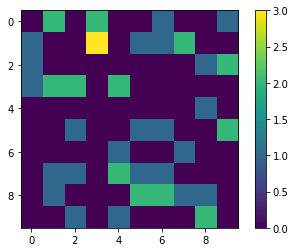

In [36]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

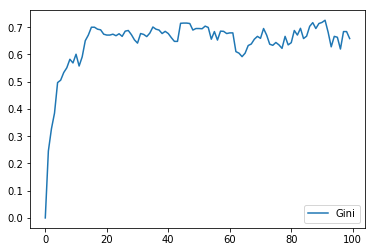

In [37]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [38]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

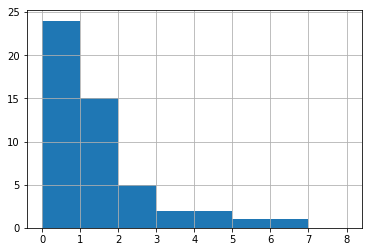

In [39]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

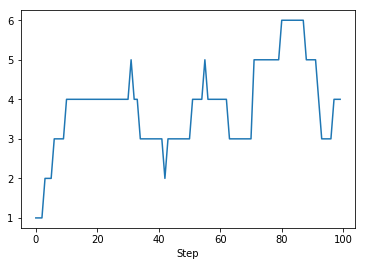

In [40]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

# Try Oystercatchers

In [118]:
# model.py
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.space import MultiGrid
import random

class OysterCatcher(Agent):
    """ A foraging agent with initial reserve."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.reserve = 10

    def move(self):
        x, y = self.pos
        
        dx = 1 + int( random.expovariate(lambd=1) ) # distribution biased to 1; is there a better one?
        dy = 1 + int( random.expovariate(lambd=1) ) # distribution biased to 1; is there a better one?
        
        if random.randint(0,1):
            dx = - dx
        if random.randint(0,1):
            dy = - dy
        #possible_steps = self.model.grid.get_neighborhood(
        #    self.pos,
        #    moore=True, # Moore setting means diagnonals can be used too
        #    include_center=False, radius=radius) # centre won't be revisited; radius sets distance travelled
        #new_position = random.choice(possible_steps) # so even if distant sites are included you may end up close
        new_position = (x + dx, y + dy) # what if we go over perimeter?
        self.model.grid.move_agent(self, new_position)
        
    #def give_money(self):
    #    cellmates = self.model.grid.get_cell_list_contents([self.pos])
    #    #print(cellmates)
    #    if len(cellmates) > 1:
    #        other = random.choice(cellmates)
    #        other.wealth += 1
    #        self.wealth -= 1
    def step(self):
        self.move()
        #if self.wealth > 0:
        #    self.give_money()
            
def record_locations(model):
    agent_locs = [cell for cell in model.grid.coord_iter() if len(cell[0])>0]
    return agent_locs

class ForageModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True) # True means toroidal space (for now)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = OysterCatcher(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = random.randrange(self.grid.width)
            y = random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
        self.datacollector = DataCollector(
            model_reporters={"Locations": record_locations},
            #agent_reporters={"Loc": lambda a: a.pos}
        )

    def step(self):
        '''Advance the model by one step.'''
        self.datacollector.collect(self)
        self.schedule.step()

In [119]:
# run.py
model = ForageModel(30, 20, 30) # based on meters of site (200 by 30)
for i in range(100):
    model.step()

In [120]:
agent_loc = model.datacollector.get_model_vars_dataframe()
agent_loc

,Locations
0,"[({}, 0, 4), ({}, 0, 21), ({}, 1, 18), ({}, 2,..."
1,"[({}, 1, 20), ({}, 2, 17), ({}, 3, 6), ({}, 3,..."
2,"[({}, 0, 19), ({}, 0, 23), ({}, 1, 6), ({}, 1,..."
3,"[({}, 0, 16), ({}, 0, 17), ({}, 0, 20), ({}, 1..."
4,"[({}, 0, 12), ({}, 1, 14), ({}, 2, 19), ({}, 2..."
5,"[({}, 0, 0), ({}, 1, 0), ({}, 1, 11), ({}, 2, ..."
6,"[({}, 0, 9), ({}, 0, 10), ({}, 0, 18), ({}, 1,..."
7,"[({}, 1, 10), ({}, 1, 13), ({}, 1, 19), ({}, 1..."
8,"[({}, 0, 10), ({}, 0, 14), ({}, 0, 18), ({}, 0..."
9,"[({}, 0, 10), ({}, 0, 11), ({}, 0, 19), ({}, 1..."


In [117]:
import numpy as np
agent_counts = np.zeros((model.grid.width, model.grid.height))
for i in range(4):
    location = agent_loc.xs(i, level="Step")["Loc"]
    #x, y = 

for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

AttributeError: 'RangeIndex' object has no attribute 'get_loc_level'

(array([6.315e+03, 2.354e+03, 8.170e+02, 3.340e+02, 1.130e+02, 4.200e+01,
        1.900e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

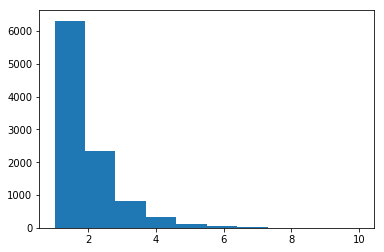

In [25]:
coll = []
for i in range(10000):
    coll.append(1+int(random.expovariate(lambd=1)))
plt.hist(coll)

In [36]:
random.randint(0,1)

1

In [39]:
if 1:
    print("me")

me


In [40]:
(2+3, 5+6)

(5, 11)

In [82]:
model.grid.coord_iter?

In [57]:
import numpy as np
print(np.random.binomial(n=100, p=0.1, size=10))

[ 7 14 14  9 13 11  6 14 15 11]


In [17]:
MultiGrid.get_neighborhood?